# **Visualising What CNNs Learn**

---


In this notebook, we use **Keras with a TensorFlow 2.0** to visualise the following (see below). This helps you gain a better understanding of what's going on under the hood and de-mystifies some of the deep learning aspects.**
1. Training a basic CNN on the MNIST Dataset
2. Visualise its filters
3. Visualise the filter activations as we propagate an input image

# **Training a Basic CNN on the MNIST Dataset**

In [1]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

2023-10-28 13:28:36.175806: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-28 13:28:36.175832: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-28 13:28:36.175851: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-28 13:28:36.181347: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-28 13:28:36.957088: W tensorflow/compiler/

In [2]:
from tensorflow.keras.utils import to_categorical

# Now we one hot encode outputs
train_labels = to_categorical(train_labels)    #one hot encoding
test_labels = to_categorical(test_labels)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(train_labels.shape[1]))

num_classes = test_labels.shape[1]
num_pixels = train_images.shape[1] * train_images.shape[2]

Number of Classes: 10


In [3]:
from tensorflow import keras
from keras import layers

inputs = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)

outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

2023-10-28 13:28:38.014322: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [4]:
%%time 

model.compile(optimizer="rmsprop",
    loss="categorical_crossentropy",   # due one-hot-encoding
    metrics=["accuracy"])

model.fit(
    train_images,
    train_labels, 
    epochs=5, 
    batch_size=64,
    validation_data = (test_images, test_labels)
    )

Epoch 1/5
938/938 [==============================] - 13s 13ms/step - loss: 0.1653 - accuracy: 0.9486 - val_loss: 0.0524 - val_accuracy: 0.9821
Epoch 2/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0459 - accuracy: 0.9860 - val_loss: 0.0375 - val_accuracy: 0.9858
Epoch 3/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0311 - accuracy: 0.9904 - val_loss: 0.0269 - val_accuracy: 0.9904
Epoch 4/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0238 - accuracy: 0.9926 - val_loss: 0.0323 - val_accuracy: 0.9890
Epoch 5/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0178 - accuracy: 0.9943 - val_loss: 0.0267 - val_accuracy: 0.9907
CPU times: user 8min 5s, sys: 8.26 s, total: 8min 13s
Wall time: 1min 1s


In [5]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.026733197271823883
Test accuracy: 0.9907000064849854


## **Get the symbolic outputs of each "key" layer (we gave them unique names).**

In [6]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'input_1': <keras.src.engine.input_layer.InputLayer at 0x7fc22013cdc0>,
 'conv2d': <keras.src.layers.convolutional.conv2d.Conv2D at 0x7fc17f7ac610>,
 'max_pooling2d': <keras.src.layers.pooling.max_pooling2d.MaxPooling2D at 0x7fc17f7ac3d0>,
 'conv2d_1': <keras.src.layers.convolutional.conv2d.Conv2D at 0x7fc17ef204f0>,
 'max_pooling2d_1': <keras.src.layers.pooling.max_pooling2d.MaxPooling2D at 0x7fc17f7ac460>,
 'conv2d_2': <keras.src.layers.convolutional.conv2d.Conv2D at 0x7fc17e6e3b80>,
 'flatten': <keras.src.layers.reshaping.flatten.Flatten at 0x7fc17ef20670>,
 'dense': <keras.src.layers.core.dense.Dense at 0x7fc17e6e3f70>}

## **Get the shapes of only our Conv Filters**

In [13]:
# summarize filter shapes
for layer in model.layers:
  # check for convolutional layer
  
  if 'conv' not in layer.name:
    continue

  # get filter weights
  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)

conv2d (3, 3, 1, 32)
conv2d_1 (3, 3, 32, 64)
conv2d_2 (3, 3, 64, 128)


## **Let's take a look at the weights of our first Conv Layer**

In [14]:
model.layers[1]

In [36]:
# retrieve weights from the first Conv (hidden) layer
filters, biases = model.layers[1].get_weights()

In [37]:
# Let's take a look at our filters
print(filters.shape)
filters

(3, 3, 1, 32)


array([[[[-5.46005033e-02, -9.70576890e-04, -2.23059230e-03,
           2.01606452e-01,  1.40683770e-01, -2.36516148e-01,
          -6.86643422e-02,  9.20074582e-02,  6.44339994e-02,
          -5.86297363e-02, -1.94745734e-01, -4.25880263e-03,
           7.37948790e-02,  1.99328773e-02, -1.81449637e-01,
          -2.58456320e-01, -2.22933009e-01,  2.37826571e-01,
          -1.64591894e-01, -2.14876249e-01,  3.00706853e-03,
           2.45807087e-03,  1.56736806e-01, -9.19452608e-02,
          -1.10125216e-02,  5.42404428e-02, -6.73893839e-02,
           1.50841162e-01,  2.46726070e-02, -3.29427570e-02,
          -3.05950064e-02,  7.47879446e-02]],

        [[-7.09618255e-03,  7.52208680e-02,  4.48967442e-02,
           1.49518535e-01,  1.05296239e-01, -9.35768262e-02,
          -2.76351810e-01,  1.15623057e-01,  9.02813599e-02,
           1.72491018e-02, -1.83436945e-01, -1.28290117e-01,
           3.63585092e-02,  7.37025589e-02, -1.74006790e-01,
          -1.39363170e-01, -1.29186884

In [38]:
# And now let's look at our biases
print(biases.shape)
biases

(32,)


array([-0.04301392, -0.0782561 ,  0.01582694,  0.00347836, -0.0075612 ,
        0.01511906,  0.04048844,  0.01094696, -0.06151121, -0.00984055,
        0.02416374, -0.06306107, -0.13667704, -0.06672078,  0.00223082,
       -0.00377497, -0.07725012,  0.01127492, -0.08443867,  0.01043962,
       -0.14124402, -0.00457152, -0.06742194, -0.10452722,  0.02326663,
       -0.1297326 , -0.0169773 , -0.0030238 , -0.07904982, -0.00155157,
       -0.01120125, -0.01566014], dtype=float32)

## **Let's normalize filter values to 0-1 so we can visualize them**

Our Filter weights range

In [39]:
f_min, f_max = filters.min(), filters.max()
print(f'Before Normalisation, Min = {f_min} and Max =  {f_max}')

Before Normalisation, Min = -0.3661034107208252 and Max =  0.266352117061615


In [40]:
filters = (filters - f_min) / (f_max - f_min)
print(f'After Normalisation, Min = {filters.min()} and Max =  {filters.max()}')

After Normalisation, Min = 0.0 and Max =  1.0


## **Visualize our Trained Fillters**

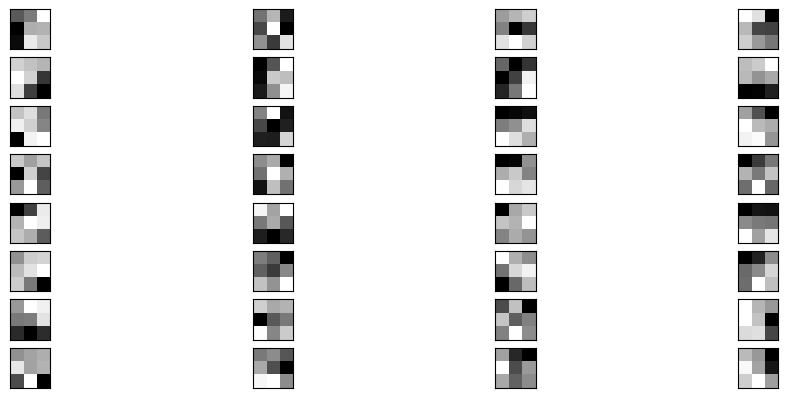

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# plot first few filters and set plot size
n_filters = 32
plt.figure(figsize=(12,20))

for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    #print(f.shape)
    plot_id = i+1
    # Arrange in subplot of 4 x 8
    ax = plt.subplot(n_filters, 4, plot_id)
    ax.set_xticks([])
    ax.set_yticks([])

    # plot filter channel in grayscale
    plt.imshow(np.squeeze(f, axis=2), cmap='gray')
    #idx += 1
    
# show the figure
plt.show()

# **Filter Activations**

In [59]:
from tensorflow.keras.models import Model

# Extracts the outputs of the top 2 layers
layer_outputs = [layer.output for layer in model.layers[:2]]

# Creates a model that will return these outputs, given the model input
activation_model = Model(inputs=model.input, outputs=layer_outputs)

In [60]:
layer_outputs

[<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_1')>,
 <KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv2d')>]

(-0.5, 27.5, 27.5, -0.5)

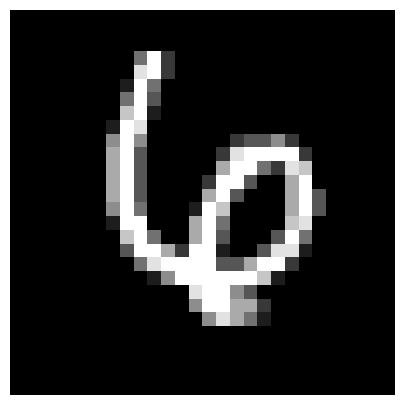

In [61]:
import matplotlib.pyplot as plt

#take a sample test image
img_tensor = test_images[22].reshape(1,28,28,1)

fig = plt.figure(figsize=(5,5))
plt.imshow(img_tensor[0,:,:,0],cmap="gray")
plt.axis('off')

## **Get the output after the 2nd Conv Filter (after ReLU)**

In [62]:
# Returns a list of two Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor)

print("Number of layer activations: " + str(len(activations)))

1/1 [==============================] - 0s 41ms/step
Number of layer activations: 2


#### **The activation of the first convolution layer for the image input**

In [63]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 28, 28, 1)


In [64]:
second_layer_activation = activations[1]
print(second_layer_activation.shape)

(1, 26, 26, 32)


In [65]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

## **The output of the 4th Conv filter Feature Map in the first Conv layer**

In [72]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.legend()

IndexError: index 3 is out of bounds for axis 3 with size 1

## **Create a function that displys the activations of specific layers**

In [73]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='viridis')
            activation_index += 1

IndexError: index 1 is out of bounds for axis 3 with size 1

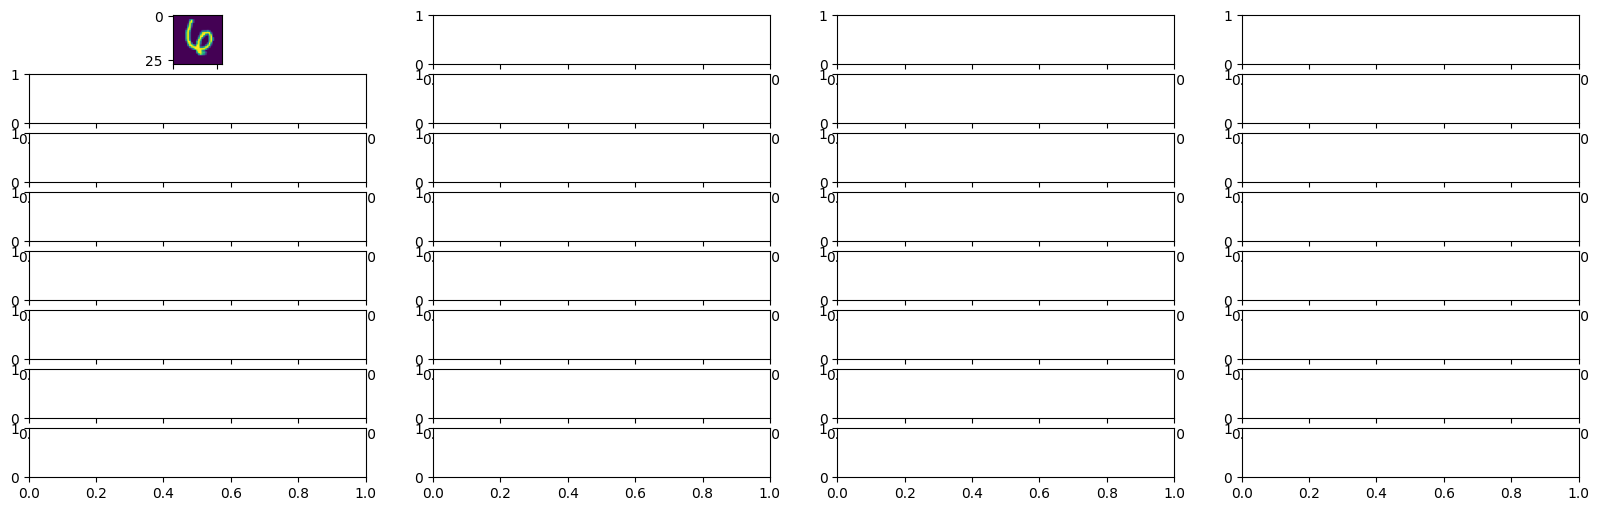

In [69]:
display_activation(activations, 4, 8, 0)